In [9]:
import numpy as np
import matplotlib.pyplot as plt

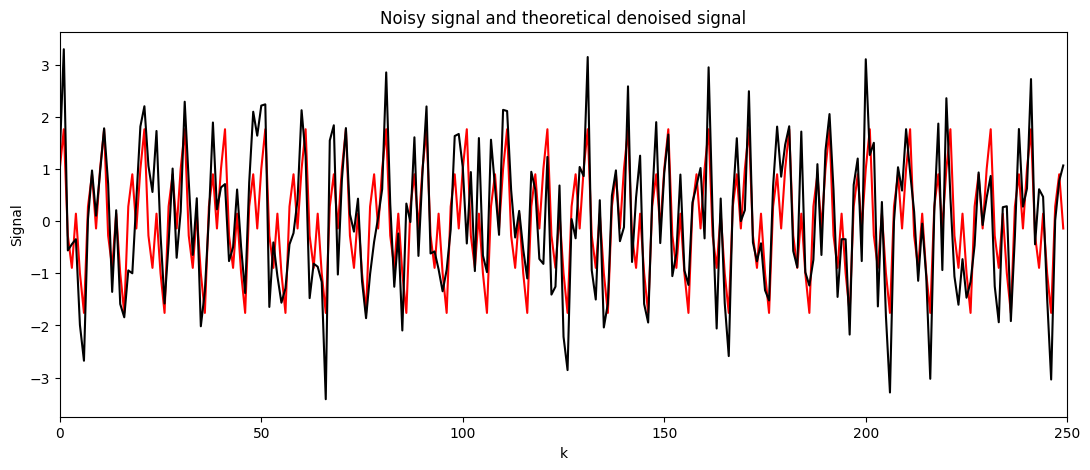

In [119]:
# Create Sample signal
k = np.arange(0, 250)
F1 = 300
F2 = 100
fs = 1000
T = 1/fs
signal = np.sin(2 * F1/fs * np.pi * k) + np.cos(2 * F2/fs * np.pi * k)
noise = np.random.normal(loc=0.0, scale=0.8, size=len(signal))

x = signal + noise

plt.figure(figsize=(13, 5))
plt.plot(k, signal, color='red', zorder=0)
plt.plot(k, x, color='black', zorder=1)
plt.title('Noisy signal and theoretical denoised signal')
plt.xlabel('k'); plt.ylabel('Signal')
plt.xlim(0, 250)
plt.show()

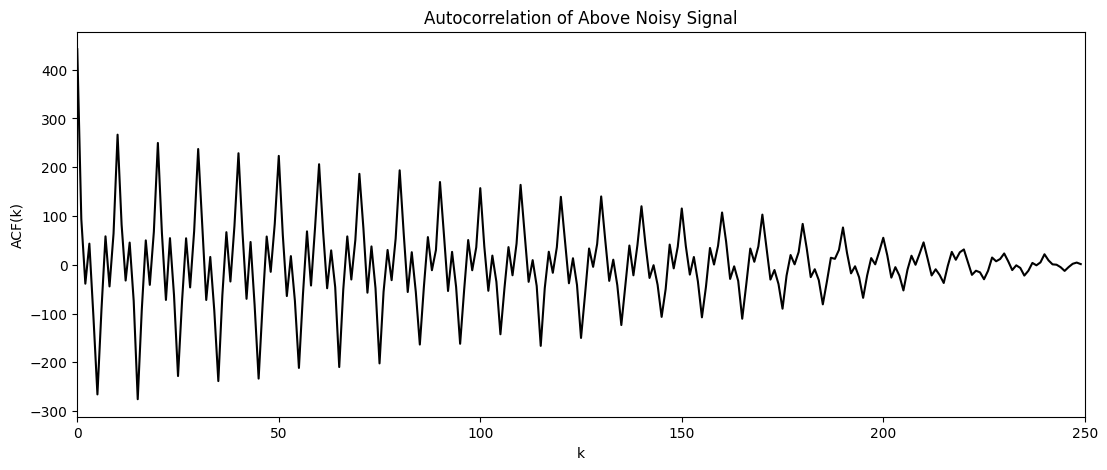

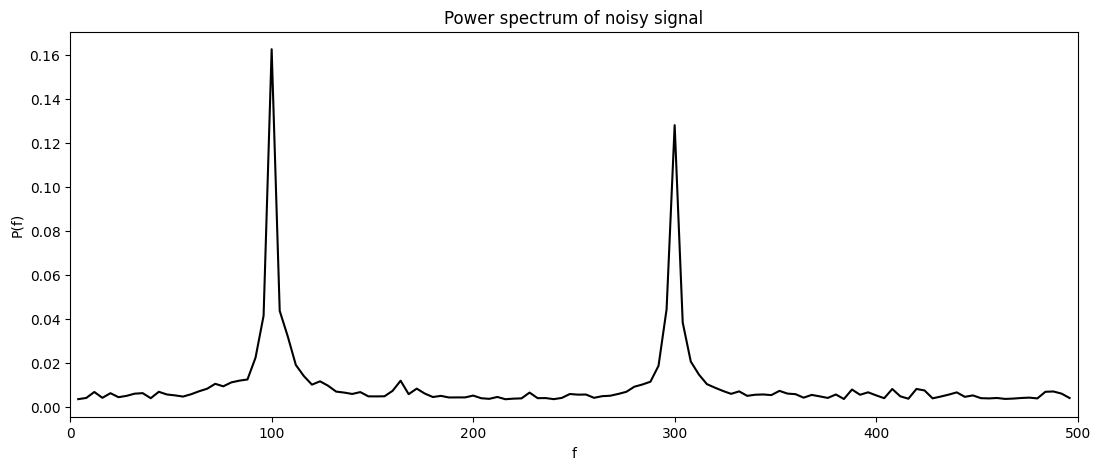

In [120]:
# ACF
ACF = np.correlate(x, x, mode='full')
ACF = ACF[ACF.size // 2:]

plt.figure(figsize=(13, 5))
plt.plot(k, ACF, color='black', zorder=1)
plt.title('Autocorrelation of Above Noisy Signal')
plt.xlabel('k'); plt.ylabel('ACF(k)')
plt.xlim(0,250)
plt.show()

# FFT of ACF -> Power Spectrum!
power = np.abs(np.fft.fft(ACF)) / len(x)**2
pfreq = np.fft.fftfreq(len(ACF), T)

idx = np.argsort(pfreq)
power = power[idx]; pfreq = pfreq[idx]
power = power[pfreq > 0]; pfreq = pfreq[pfreq > 0]

plt.figure(figsize=(13, 5))
plt.plot(pfreq, power, color='black')
plt.title('Power spectrum of noisy signal')
plt.xlabel('f'); plt.ylabel('P(f)')
plt.xlim(0, 500)
plt.show()

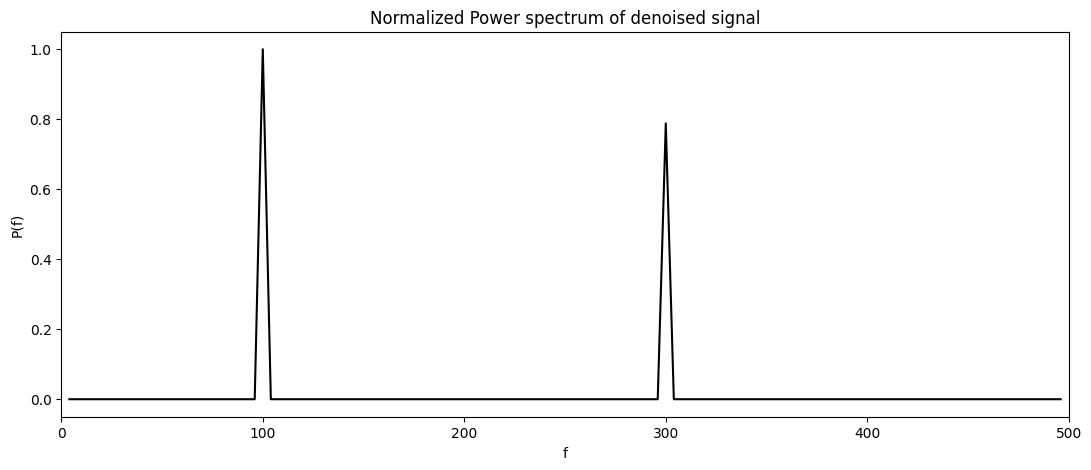

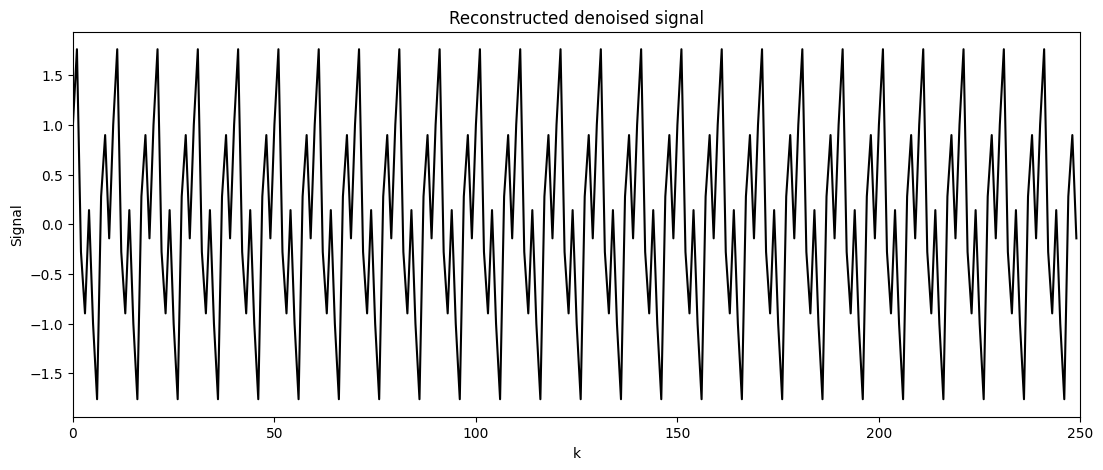

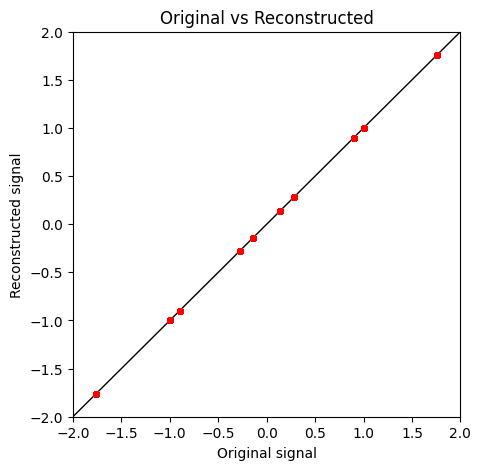

In [121]:
# Denoising and denoised signal reconstruction
threshold = 0.10
power_denoised = np.where(power < threshold, 0, power)
power_denoised = power_denoised / np.max(power_denoised)

plt.figure(figsize=(13, 5))
plt.plot(pfreq, power_denoised, color='black')
plt.title('Normalized Power spectrum of denoised signal')
plt.xlabel('f'); plt.ylabel('P(f)')
plt.xlim(0, 500)
plt.show()

Farr = pfreq[power_denoised >= threshold]
signal_recon = np.sin(2 * Farr[1]/fs * np.pi * k) + np.cos(2 * Farr[0]/fs * np.pi * k)
plt.figure(figsize=(13, 5))
plt.plot(k, signal_recon, color='black', zorder=1)
plt.title('Reconstructed denoised signal')
plt.xlabel('k'); plt.ylabel('Signal')
plt.xlim(0, 250)
plt.show()

plt.figure(figsize=(5,5))
plt.plot([-2,2], [-2,2], lw=1, color='black', zorder=0)
plt.scatter(signal, signal_recon, color='red', s=15)
plt.title('Original vs Reconstructed')
plt.xlabel('Original signal'); plt.ylabel('Reconstructed signal')
plt.xlim(-2, 2); plt.ylim(-2, 2); 
plt.show()